In [1]:
import pandas as pd
import numpy as numpy
import missingno as msno
data = pd.read_csv("C:/PYTHON/dataset/netflix_titles.csv", encoding="latin-1")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
#data.tail()

In [3]:
data.shape

(8807, 12)

In [39]:
#data.info()

In [38]:
#data.isnull().sum()

In [37]:
#print(f'{round(data.isnull().sum() / len(data) * 100, 2)}')

In [36]:
#data.nunique()

In [12]:
data['date_added']= data['date_added'].astype(str).str.strip()

In [13]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_added'].isna().sum()

10

In [14]:
data['director'] = data['director'].fillna('Not Specified')
data['cast']= data['cast'].fillna('Not Specified')
data['country'] = data['country'].fillna('Not Specified')
data['date_added']= data['date_added'].fillna(data['date_added'].mean())

In [35]:
#data.isna().sum()

In [16]:
data.dropna(inplace=True)

In [31]:
top_30 = data['release_year'].value_counts().head(30)
print(top_30.index)
print(top_30.values)

Index([2018, 2017, 2019, 2020, 2016, 2021, 2015, 2014, 2013, 2012, 2010, 2011,
       2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2001, 1999, 1997, 2000,
       1998, 1993, 1995, 1996, 1992, 1994],
      dtype='int64', name='release_year')
[1147 1030 1030  953  902  592  557  352  287  237  193  185  152  136
   96   88   80   64   61   51   45   39   38   37   36   28   25   24
   23   22]


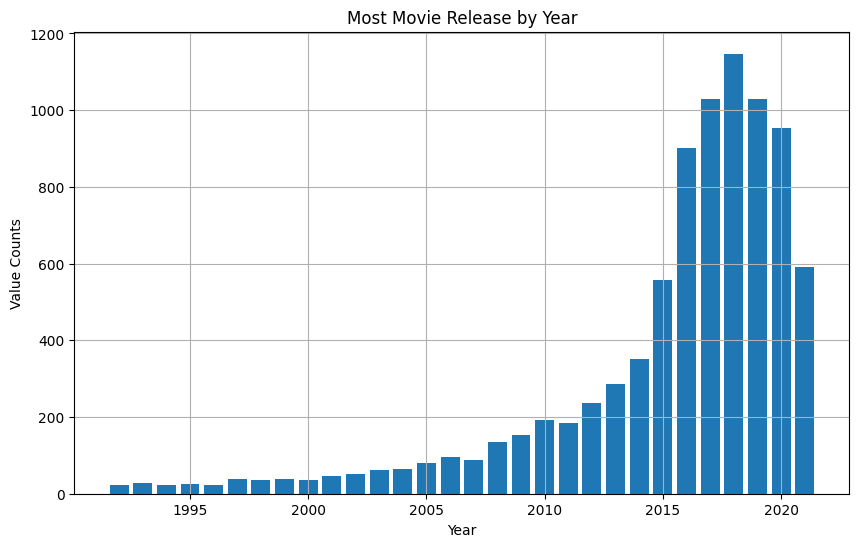

In [34]:
import matplotlib.pyplot as plt

data['release_year'].value_counts().head(30)
plt.figure(figsize=(10,6))
plt.title("Most Movie Release by Year")
plt.bar(top_30.index, top_30.values )
plt.xlabel('Year')
plt.ylabel('Value Counts')
plt.grid(True)
plt.show()


In [41]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [43]:
m_type = data['type'].value_counts()
m_type

type
Movie      6126
TV Show    2674
Name: count, dtype: int64

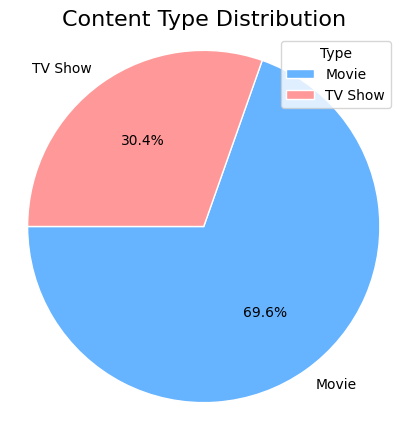

In [47]:
plt.figure(figsize=(5, 5))
plt.title("Content Type Distribution", fontsize=16)

"""
Pass m_type.values as the first argument and labels=m_type.index.
Use autopct to show percentages.
startangle rotates the start position for better aesthetics.
plt.axis("equal") makes the pie circular.
No need for xlabel/ylabel on a pie chart.

"""
# Pie chart: values first, then labels
plt.pie(
    m_type.values,
    labels=m_type.index,
    autopct="%1.1f%%",
    startangle=180,
    colors=["#66b3ff", "#ff9999"],
    wedgeprops={"edgecolor": "white"}
)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis("equal")

plt.legend(
    m_type.index,
    title="Type",
    loc="upper right"
)

plt.show()

In [51]:
n_country = data['country'].value_counts().head(30)

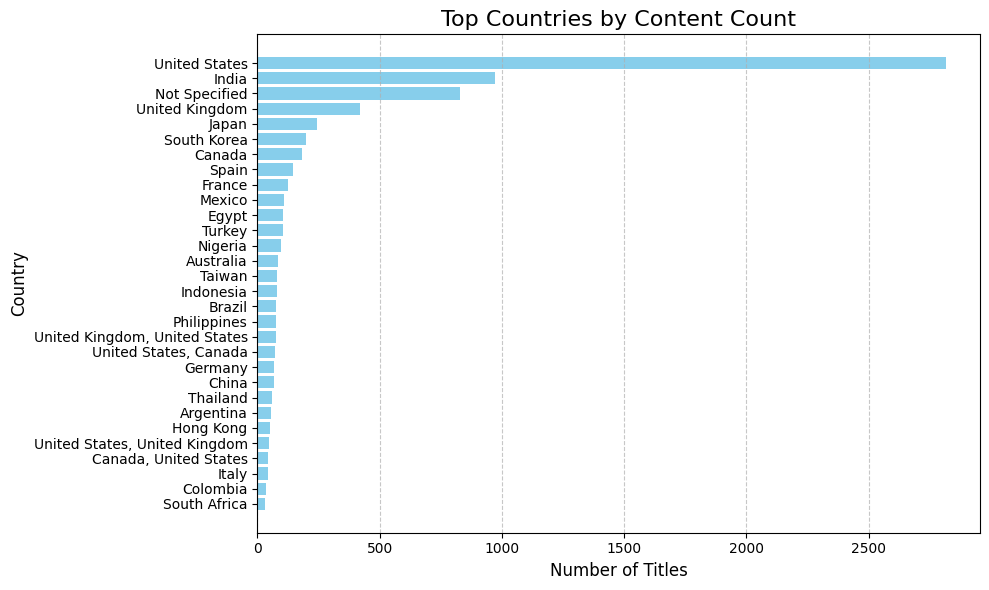

In [56]:
"""
Guide:
plt.barh() draws a horizontal bar chart.
plt.gca().invert_yaxis() flips the order so the largest bar is at the top.
Added tight_layout() to ensure labels aren’t cut off.
"""

plt.figure(figsize=(10, 6))
plt.title("Top Countries by Content Count", fontsize=16)

# Horizontal bar chart
plt.barh(n_country.index, n_country.values, color='skyblue')

# Invert y-axis so the highest value appears at the top
plt.gca().invert_yaxis()

plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [59]:
n_director = data['director'].value_counts().head(30)
n_director

director
Not Specified              2631
Rajiv Chilaka                19
RaÃºl Campos, Jan Suter      18
Suhas Kadav                  16
Marcus Raboy                 16
Jay Karas                    14
Cathy Garcia-Molina          13
Martin Scorsese              12
Jay Chapman                  12
Youssef Chahine              12
Steven Spielberg             11
Don Michael Paul             10
David Dhawan                  9
Hakan AlgÃ¼l                  8
Fernando AyllÃ³n              8
Robert Rodriguez              8
Johnnie To                    8
Troy Miller                   8
Quentin Tarantino             8
Kunle Afolayan                8
YÄ±lmaz ErdoÄan              8
Shannon Hartman               8
Lance Bangs                   8
Ryan Polito                   8
Prakash Satam                 7
Justin G. Dyck                7
Hidenori Inoue                7
Mae Czarina Cruz              7
Toshiya Shinohara             7
Ron Howard                    7
Name: count, dtype: int64